In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')

## Reading and understanding the data

In [2]:
data = pd.read_csv('diabetes.csv')
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Checking If there is any null value
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Statistical information
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# check if data is balanced or not
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Visualising the Data

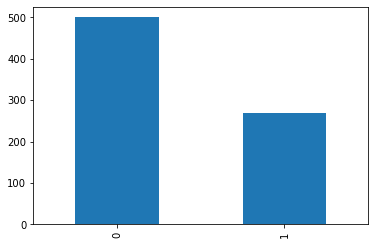

In [8]:
data.Outcome.value_counts().plot.bar()
plt.show()

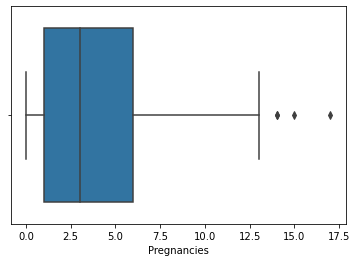

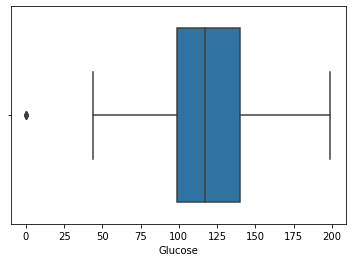

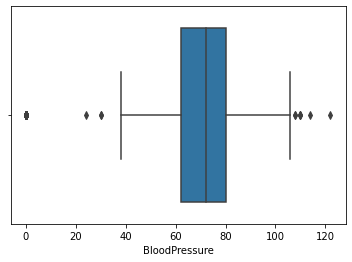

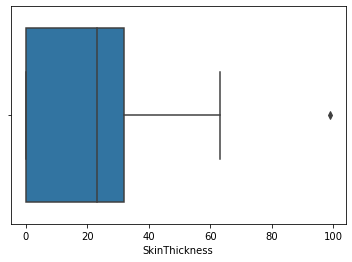

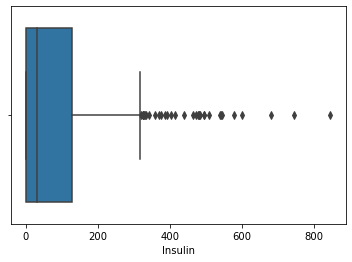

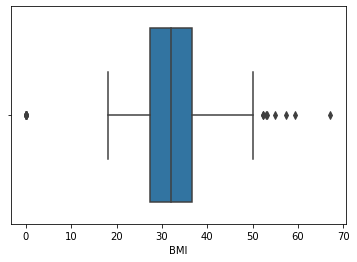

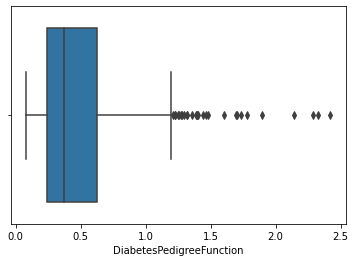

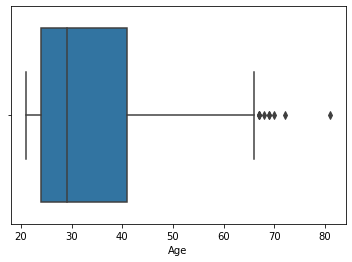

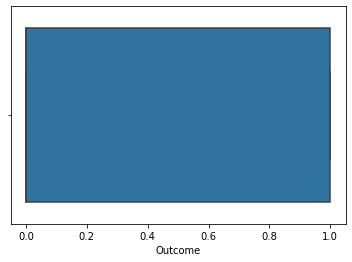

In [9]:
# outliers
for col in data.describe().columns:
        sns.boxplot(data[col])
        plt.show()

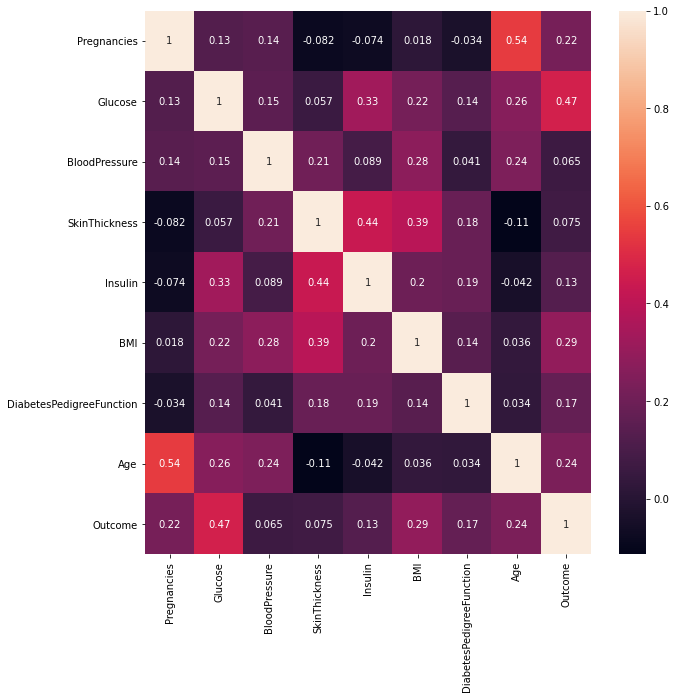

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

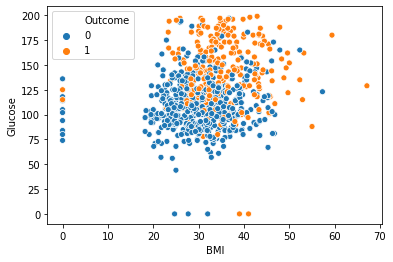

In [11]:
sns.scatterplot(data.BMI, data.Glucose,hue=data.Outcome)
plt.show()

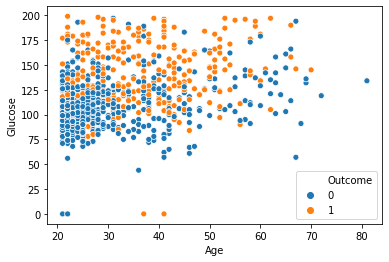

In [12]:
sns.scatterplot(data.Age, data.Glucose,hue=data.Outcome)
plt.show()

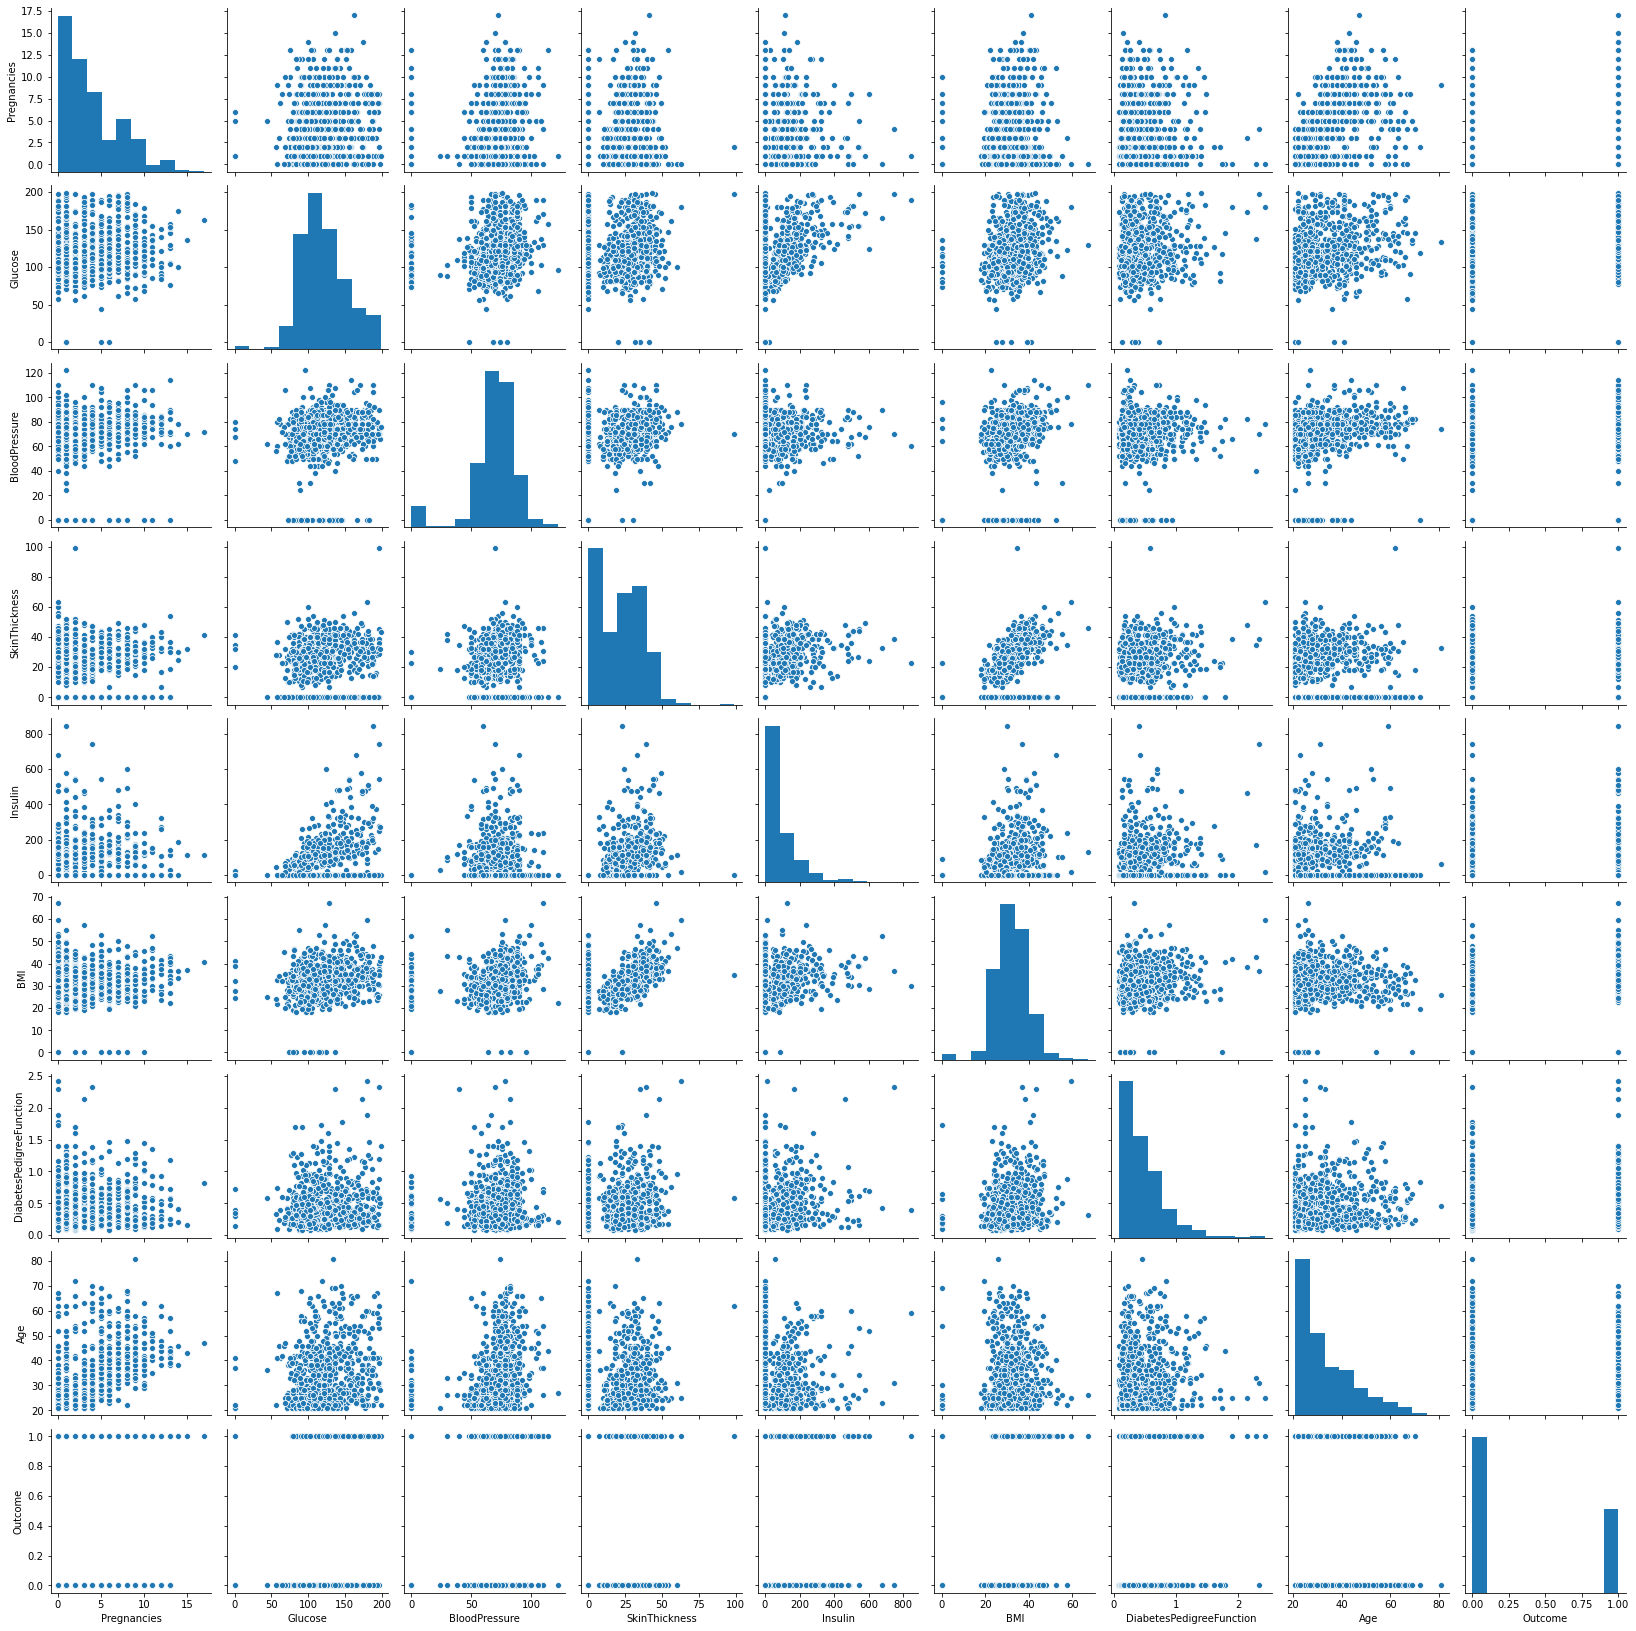

In [13]:
sns.pairplot(data)
plt.show()


- we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. 
- check 0 values, there are some infomation which can not be consider as 0 so we consider it as a Null value

In [14]:
col = ['BMI','Glucose','BloodPressure','Insulin','SkinThickness']
for c in col:
    print(c," : ",data[data[c]==0].size)

BMI  :  99
Glucose  :  45
BloodPressure  :  315
Insulin  :  3366
SkinThickness  :  2043


In [15]:
# now replacing the 0 values(Null) with the mean of each column

In [16]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [17]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1
767,1,93.0,70.0,31.000000,79.799479,30.4,0.315,23,0


In [18]:
for c in col:
    print(c," : ",data[data[c]==0].size)

BMI  :  0
Glucose  :  0
BloodPressure  :  0
Insulin  :  0
SkinThickness  :  0


#### Hadling the outliers
- As we can see in boxplot there are some outliers in some features
- Outliers are data points that are far from other data points. In other words, they're unusual values in a dataset. Outliers are problematic for analyses because they can cause tests to either miss significant findings or distort real results.
- here we create a new data set without Outliers which is data_cleaned dataset

In [19]:
q = data['Pregnancies'].quantile(0.98)
q

12.0

In [20]:
# only take that data which are less then 'q' values and store it into new dataset
data_cleaned = data[data['Pregnancies'] < q]
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [21]:
# similarly for other features

q = data_cleaned['BMI'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['BMI'] < q]

q = data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['SkinThickness'] < q]

q = data_cleaned['Insulin'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Insulin'] < q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction'] < q]

q = data_cleaned['Age'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Age'] < q]

In [22]:
data_cleaned.shape

(703, 9)

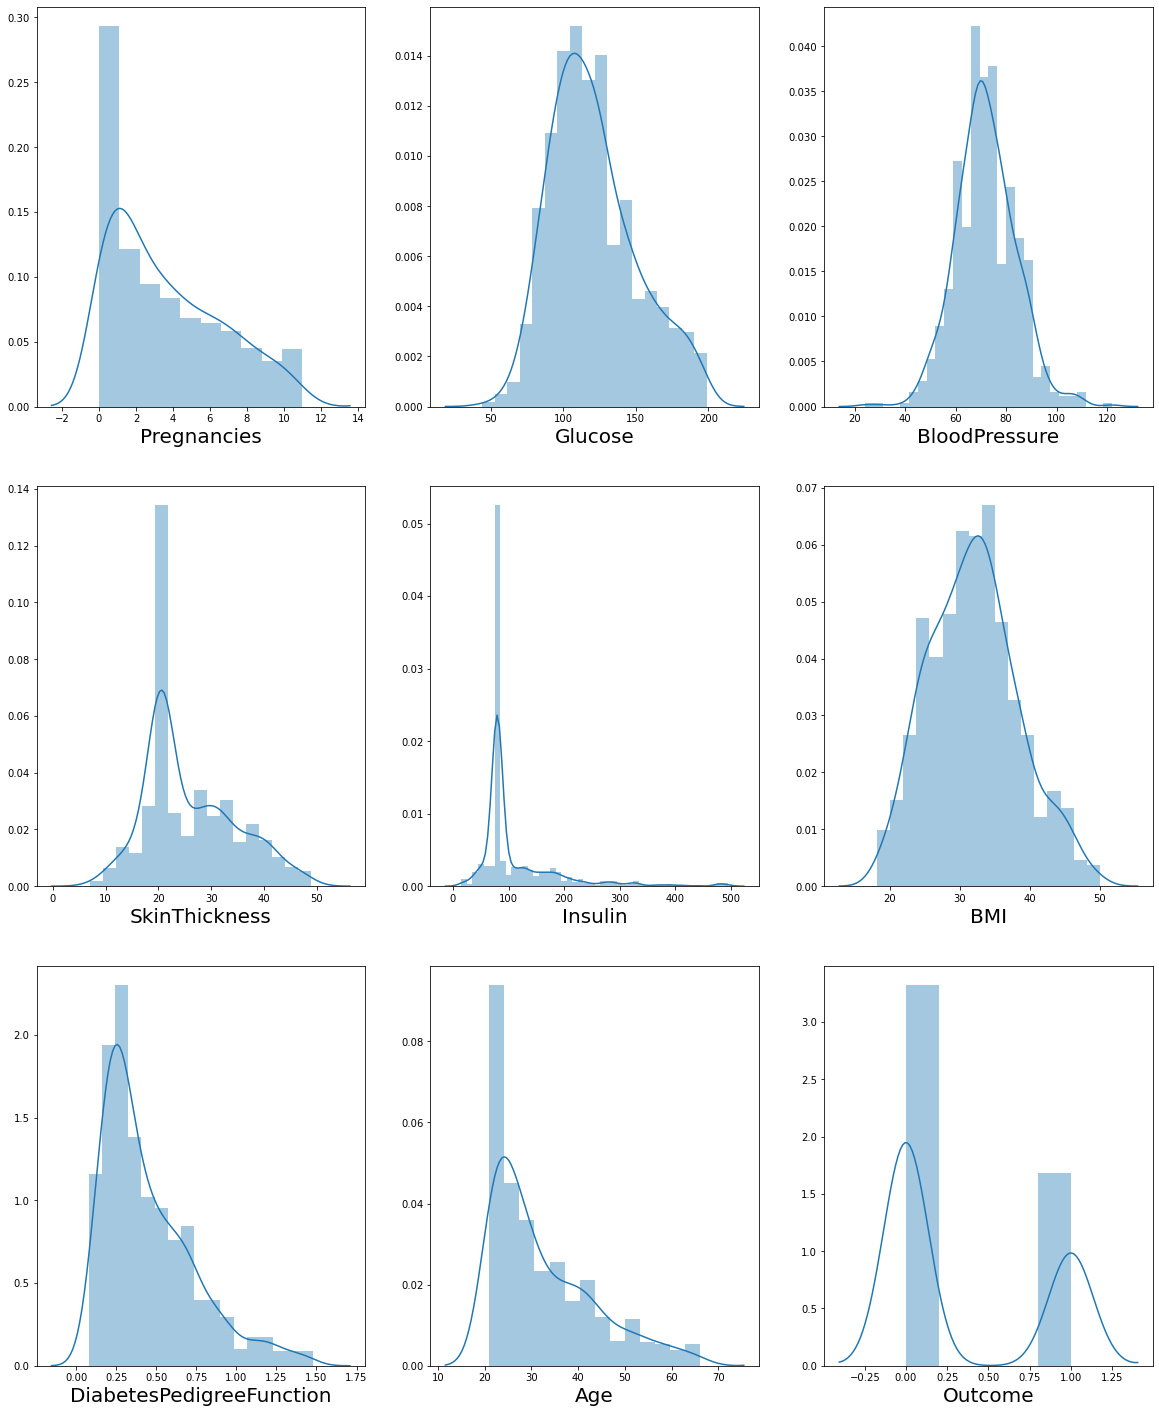

In [23]:
plt.figure(figsize=(20,25), facecolor='white')
plotno = 1

for col in data_cleaned:
    if plotno <= 9:
        ax = plt.subplot(3,3,plotno)
        sns.distplot(data_cleaned[col])
        plt.xlabel(col, fontsize = 20)
        
    plotno += 1
plt.show()

In [24]:
## Saparating dependent(y) and independent(X) varianles

In [25]:
X = data_cleaned.drop(columns=['Outcome'])
y = data_cleaned['Outcome']

## Rescaling the Features
- in 'Diabetes' dataset except for 'Outcome', all the columns have small integer values.
- so it is extremely important to rescale the variables so that they have a comparable scale.
- if we don't have comparable scales, then some of the coeff. as obtained by fitting the regression model might be very large or very small as compared to the other coeff.
- this might be very annoying at the time of model evaluation.

##### as we know, there are two common ways to rescaling
1. Min-Max Scaling
2. Standardisation (mean-0, sigma-1)

- rescale all the numeric data in between 0 to 1
### we use Standardisation (StandardScaler)

In [26]:
# need to scale data
from sklearn.preprocessing import StandardScaler

In [27]:
def stand_scale(X,col):
        st = StandardScaler()
        X[col] = st.fit_transform(X[[col]])
        return X

In [28]:
for col in X.columns:
    X = stand_scale(X,col)

In [29]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.791478,0.914047,0.003064,1.060310,-0.439363,0.251978,0.618862,1.593267
1,-0.874417,-1.195443,-0.501284,0.360932,-0.439363,-0.847915,-0.346004,-0.134529
2,1.457836,2.085985,-0.669400,-0.625604,-0.439363,-1.366436,0.776178,-0.043593
3,-0.874417,-1.061507,-0.501284,-0.338446,-0.248615,-0.612224,-0.989248,-1.043896
5,0.458299,-0.157440,0.171180,-0.625604,-0.439363,-1.005043,-0.870388,-0.225466


### Checking VIF
- Variance Inflation Factor (VIF), gives a basic quantitative idea ablut how much the feautre variables are correlated with each other.

- it is an extremely important parameter to test our model.

In [30]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
X.shape[1] , X.shape

(8, (703, 8))

In [32]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Columns'] = X.columns



- we generally want a VIF theat is less than 5
- so, there are no need to drop any feature

In [33]:
## VIF should be less then 5 That means no multicollinearity.
vif.sort_values(by='VIF', ascending=False)

,VIF,Columns
7,1.683304,Age
5,1.521580,BMI
0,1.467518,Pregnancies
3,1.465686,SkinThickness
1,1.347546,Glucose
4,1.281218,Insulin
2,1.256485,BloodPressure
6,1.036125,DiabetesPedigreeFunction


## Splitting the Data into Training and Testing Sets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state = 0)

In [36]:
x_train.shape, x_test.shape

((562, 8), (141, 8))

## Building a model
### 1. Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [38]:
gn = GaussianNB()
gn.fit(x_train,y_train)
naive_pred = gn.predict(x_test)

In [39]:
print("Accuracy_Score: ",accuracy_score(y_test, naive_pred),"\n")

Accuracy_Score:  0.7801418439716312 



In [40]:
print("Confusion_Matrix: \n")
con_mat = confusion_matrix(y_test,naive_pred)
con_mat

Confusion_Matrix: 



array([[85, 15],
       [16, 25]], dtype=int64)

In [41]:
TP = con_mat[0][0]
FP = con_mat[0][1]
FN = con_mat[1][0]
TN = con_mat[1][1]

In [42]:
# Precison
Precision = TP/(TP+FP)
Precision

0.85

In [43]:
# Recall
Recall = TP/(TP+FN)
Recall

0.8415841584158416

In [44]:
# Area Under Curve
auc = roc_auc_score(y_test, naive_pred)
auc

0.7298780487804879

#### ROC Curve

In [45]:
fpr, tpr, thresholds = roc_curve(y_test,naive_pred)

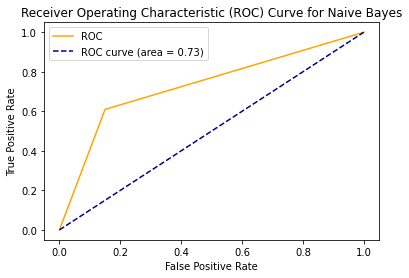

In [46]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [47]:
# cross validation for naive bayes
from sklearn.model_selection import cross_val_score
score_naive = cross_val_score(gn, X,y, cv=10)
score_naive.mean()

0.7553722334004024

### 2. Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logit = LogisticRegression()
logit.fit(x_train,y_train)
logit_pred = logit.predict(x_test)

In [50]:
print("Accuracy_Score: ",accuracy_score(y_test, logit_pred),"\n")

Accuracy_Score:  0.8014184397163121 



In [51]:
con_mat_logit = confusion_matrix(y_test,logit_pred)
con_mat_logit

array([[88, 12],
       [16, 25]], dtype=int64)

In [52]:
TP = con_mat_logit[0][0]
FP = con_mat_logit[0][1]
FN = con_mat_logit[1][0]
TN = con_mat_logit[1][1]

In [53]:
# Precison
Precision = TP/(TP+FP)
Precision

0.88

In [54]:
# Recall
Recall = TP/(TP+FN)
Recall

0.8461538461538461

In [55]:
# Area Under Curve
auc = roc_auc_score(y_test, naive_pred)
auc

0.7298780487804879

#### ROC Curve

In [56]:
# ROC
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, logit_pred)


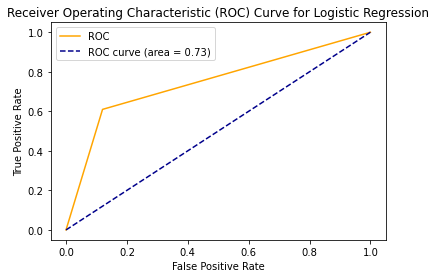

In [57]:
plt.plot(fpr_logit, tpr_logit, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend()
plt.show()

In [58]:
# cross validation for logistic regression
from sklearn.model_selection import cross_val_score
score_logit = cross_val_score(logit, X,y, cv=10)
score_logit.mean()

0.7838430583501006

### Summary:
- Here Logistic Regression gives more accuracy then Naive Byes with good precision and recall for Predicting Diabates
- Logistic Regression Accuracy:- 78%
- Naive Bayes accuracy:- 75%
- we go with logistic regression

In [59]:
import pickle

In [60]:
# pickle.dump(logit,open('diabates_pred.pkl','wb'))

#### Advantages:

- Naive Bayes is extremely fast for both training and prediction as they not have to learn to create separate classes.
- Naive Bayes provides a direct probabilistic prediction.
- Naive Bayes is often easy to interpret.
- Naive Bayes has fewer (if any) parameters to tune

#### Disadvantages:
- The algorithm assumes that the features are independent which is not always the scenario
- Zero Frequency i.e. if the category of any categorical variable is not seen in training data set even once then model assigns a zero probability to that category and then a prediction cannot be made.